In [1]:
import numpy as np
from matplotlib import pyplot as plt

We start with three different input patterns that we will use to train the network. The are strings of minus ones and plus ones, which, when rendered as 5-by-5 pixels look like the digits "1", "2" and "0". 

In [2]:
x1 = np.array([-1, 1, 1,-1,-1,
               -1,-1, 1,-1,-1,
               -1,-1, 1,-1,-1, 
               -1,-1, 1,-1,-1,
               -1, 1, 1, 1,-1])
x2 = np.array([-1, 1, 1,-1,-1,
                1,-1,-1, 1,-1,
               -1,-1, 1,-1,-1, 
               -1, 1,-1,-1,-1,
               1, 1, 1, 1,-1])
x3 = np.array([-1, 1, 1, 1,-1,
                1,-1,-1,-1, 1,
                1,-1,-1,-1, 1, 
                1,-1,-1,-1, 1,
               -1, 1, 1, 1,-1])


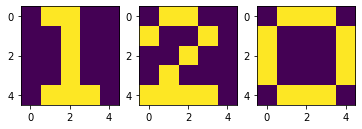

In [3]:
plt.subplot(131)
plt.imshow(x1.reshape(5,5))
plt.subplot(132)
plt.imshow(x2.reshape(5,5))
plt.subplot(133)
plt.imshow(x3.reshape(5,5))
plt.show()

Next we create the weight matrix `w` which has 25 rows and 25 columns. Initially all weights are zero.

In [4]:
n = x1.shape[0]
w = np.zeros((n,n))

Now we loop over the three training images. For each image we increase the weight `w[i,j]` by one if the pixels in the training image have the same value, and we decrease the weight if the pixels have different values.

In [5]:
xx = np.array([x1, x2, x3])
for k in range(xx.shape[0]):
    for i in range(n):
        for j in range(n):
            if i != j:
                w[i,j] += xx[k,i] * xx[k,j]


For interest, the resulting weight matrix looks as follows:

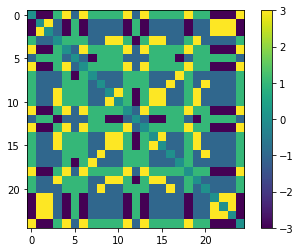

In [6]:
plt.imshow(w)
plt.colorbar()
plt.show()

That was the entire training of the neural network. Now we let it "react" to new stimuli.

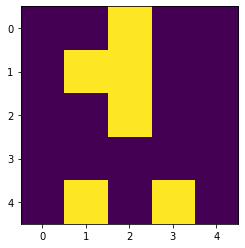

In [7]:
x_new = np.array([-1,-1, 1,-1,-1,
                  -1, 1, 1,-1,-1,
                  -1,-1, 1,-1,-1, 
                  -1,-1,-1,-1,-1,
                  -1, 1,-1, 1,-1])
plt.imshow(x_new.reshape(5,5))
plt.show()

In the three training images, pixels 2 and 3 (the 2nd and 3rd in the top row) always showed the same value. Therefore, the connection between the two is very strong (`w[2,3] = +3`). In the new image, pixel 3 is plus one ("neuron 3 fires"), so pixel 3 should send a strong impulse to pixel 2 to also be plus one. Likewise, if it were negative, it should send a strong impulse to pixel 2 to be minus one. So the product `w[2,3] * x_new[3]` is a reasonable quantity to use for the activation impulse that `x_new[3]` sends to pixel 2.

Now pixel 2 gets such impulses not only from pixel 3, but from 23 other pixels as well. How does it deal with all these different inputs? A reasonable thing to do is to add them all up. The impulse from some pixels will be in the positive direction, the impulse from some will be in the negative direction. By adding all the impulses up, it can react to the consensus of all the pixels to which it is connected. So the total impuls that pixel 2 sees is given by

    w[2,1] * x_new[1] + w[2,3] * x_new[3] + ... + w[2,25] * x_new[25]

And the same is true for all the other pixels. If we set the connection of a pixel with itself `w[i,i]` to zero (which we have done in the calculation above), we have the impulse that pixel `i` gets from all the others given by

    w[i,1] * x_new[1] + w[i,2] * x_new[2] + ... + w[i,25] * x_new[25]
    
If we let `y_new` denote the vector of the 25 responses of the 25 pixels to the input `x_new`, the equation above implies the `y_new` is the matrix-vector-product of the 25-by-25 matrix `w` whose element `w[i,j]` is the connection strength between pixel `i` and pixel `j`, and the vector `x_new` which has 25 elements.

    y_new = np.matmul(w, x_new)
    
Lastly, we simply say that the `i`-th pixel is +1 (neuron `i` fires) if the sum impulse it gets from all the other pixels is greater than 0. If the sum impulse is not greater than zero, it is minus 1 (neuron `i` doesn't fire). All this is encoded in the equation for `y_new` below: 

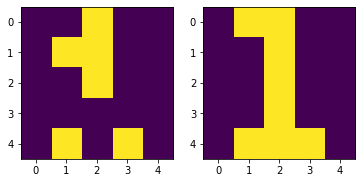

In [8]:
y_new = 2 * (np.matmul(w, x_new) > 0) - 1
plt.subplot(121)
plt.imshow(x_new.reshape(5,5))
plt.subplot(122)
plt.imshow(y_new.reshape(5,5))
plt.show()

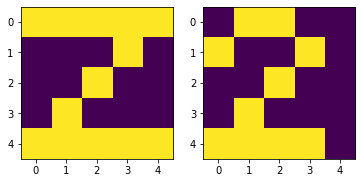

In [9]:
x_new = np.array([ 1, 1, 1, 1, 1,
                  -1,-1,-1, 1,-1,
                  -1,-1, 1,-1,-1, 
                  -1, 1,-1,-1,-1,
                   1, 1, 1, 1, 1])

y_new = 2 * (np.matmul(w, x_new) > 0) - 1
plt.subplot(121)
plt.imshow(x_new.reshape(5,5))
plt.subplot(122)
plt.imshow(y_new.reshape(5,5))
plt.show()

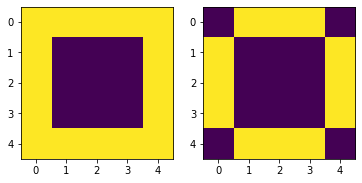

In [10]:
x_new = np.array([1, 1, 1, 1, 1,
                  1,-1,-1,-1, 1,
                  1,-1,-1,-1, 1, 
                  1,-1,-1,-1, 1,
                  1, 1, 1, 1, 1])
y_new = 2 * (np.matmul(w, x_new) > 0) - 1
plt.subplot(121)
plt.imshow(x_new.reshape(5,5))
plt.subplot(122)
plt.imshow(y_new.reshape(5,5))
plt.show()

In conclusion we see that the thus generated neuron firing pattern in response to a new input "recalls" the input that was seen during training that is "closest" or "most similar" to the new input.

The Hopfield network exhibits learning and associative memory.